In [243]:
# Make this work for 1500
# Dynamic plot titles with dates

--------

# Latitude values are measured relative to the equator and range from -90° at the South Pole to +90° at the North Pole. Longitude values are measured relative to the prime meridian. They range from -180° when traveling west to 180° when traveling east. If the prime meridian is at Greenwich, then Australia, which is south of the equator and east of Greenwich, has positive longitude values and negative latitude values.
# http://desktop.arcgis.com/en/arcmap/10.3/guide-books/map-projections/about-geographic-coordinate-systems.htm
# citipy??

# X Name a city, feed to OWM
# X Peform weather check
# X Understand JSON set up
# X Identify Temp, Humid, Cloud, Wind Speed

# X Randomly generate 1 lat/long combo within repspective ranges
# X Test in CitiPy; get city name
# X Feed to OWM
# X Pull stuff from JSON

# X ok - Randomly generate 500 lat/longs
# X Kill dupes
# X Citipy
# Print this!

# X Feed list to OWM
# X Loop for info
# X If 404, lat/longLIST.POP? and CONTINUE
# X Store

# X Csv: csvpath = os.path.join("04-Pandas","1","Activities", "02-Stu_NetflixRemix", "Resources","netflix_ratings.csv")
# X Save the DataFrame as a csv
###*** dataframe.to_csv("output_analysis/zip_bank_data.csv", encoding="utf-8", index=False)

# X Create graphs

#How to work with citipy:

lat = 20
>>> lon = 75
>>> city = citipy.nearest_city(lat, lon)
>>> print(city)
<citipy.citipy.City object at 0x109724f98>
>>> city.city_name
'khuldabad'
>>> city.country_code
'in'

Openweather: Please, always use your API keys as &APPID=key


lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)

just a heads up, using randomly generated lats/longs can pick points in the ocean. citipy.nearest_city can be used to find cities that can be queried on

Processing Record 1 of Set 1 | longyearbyen

In [244]:
# Import Dependencies
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import json
import requests
import datetime
from citipy import citipy
from config import api_key

#api.openweathermap.org/data/2.5/weather?q=London,uk

target_url = "http://api.openweathermap.org/data/2.5/weather" \
    "?q=Phoenix,us&units=IMPERIAL&mode=json&APPID=" + api_key
    
#api.openweathermap.org/data/2.5/weather?q=London,uk

In [245]:
base_url = "http://api.openweathermap.org/data/2.5/weather"

params = {
    "q": "New York,US",
    "units": "IMPERIAL",
    "mode": "json",
    "APPID": api_key
}

In [246]:
response = requests.get(base_url, params=params)
print(response.url)

http://api.openweathermap.org/data/2.5/weather?q=New+York%2CUS&units=IMPERIAL&mode=json&APPID=84e9790cfed06e9f791a3c163ba4c987


In [247]:
city_weather = response.json()
city_weather.keys()

dict_keys(['coord', 'weather', 'base', 'main', 'visibility', 'wind', 'clouds', 'dt', 'sys', 'id', 'name', 'cod'])

city_weather['coord']

city_weather['coord']['lat']

In [248]:
temp = city_weather['main']['temp']
humidity = city_weather['main']['humidity']
wind_speed = city_weather['wind']['speed']
cloudiness = city_weather['clouds']['all']

In [249]:
samples = 50
lats = np.random.uniform(low=-90.000, high=90.000, size=samples) 
lngs = np.random.uniform(low=-180.000, high=180.000, size=samples)

lats = list(lats)
lngs = list(lngs)


print(lats,lngs)

#np.delete(arr, 1, 0)

np.delete(lats, 1, 0)
lats

In [250]:
cities = []
countries = []
timestamps = []
dates = []
max_temps = []
humidities = []
windspeeds = []
cloudiness = []

j = 0
while j < len(lats):
    print(lats[j], lngs[j])
    
    one_city = citipy.nearest_city(lats[j], lngs[j])
    city_name = one_city.city_name
    city_country_code = one_city.country_code
    
    print(f'Processing Record {j+1} of Set 1 | {city_name}')
    
    # Build OpenWeatherMap API query
    
    query = city_name + ',' + city_country_code
    base_url = "http://api.openweathermap.org/data/2.5/weather"
    params = {
            "q": query,
            "units": "IMPERIAL",
            "mode": "json",
            "APPID": api_key
            }
    response = requests.get(base_url, params=params)
    city_weather = response.json()
    
    #print(city_name, city_country_code)

    try:

        timestamps.append(city_weather['dt'])
        dates.append(datetime.datetime.fromtimestamp\
                     (int(city_weather['dt'])).strftime('%m-%d-%Y'))
        max_temps.append(city_weather['main']['temp'])
        humidities.append(city_weather['main']['humidity'])
        windspeeds.append(city_weather['wind']['speed'])
        cloudiness.append(city_weather['clouds']['all'])
        
        cities.append(one_city.city_name)
        countries.append(one_city.country_code)
        
        j += 1
    
    except KeyError:
        del lats[j]
        del lngs[j]
        print("Oops, that city doesn't exist in OpenWeatherMap.")

26.7318515217 -155.11273872
Processing Record 1 of Set 1 | kailua
47.9909270556 -47.6494072023
Processing Record 2 of Set 1 | torbay
-83.3919738001 -27.4508438117
Processing Record 3 of Set 1 | ushuaia
40.3571111467 -137.553780468
Processing Record 4 of Set 1 | eureka
-63.6970877569 -151.236559626
Processing Record 5 of Set 1 | mataura
Oops, that city doesn't exist in OpenWeatherMap.
84.8130611127 143.201510643
Processing Record 5 of Set 1 | chokurdakh
18.5125453309 82.3091206746
Processing Record 6 of Set 1 | jaypur
4.05357874838 156.475824376
Processing Record 7 of Set 1 | namatanai
9.58918080092 15.3618865823
Processing Record 8 of Set 1 | fianga
Oops, that city doesn't exist in OpenWeatherMap.
-9.49327467858 -172.099906834
Processing Record 8 of Set 1 | saleaula
Oops, that city doesn't exist in OpenWeatherMap.
25.647314921 -26.8327653181
Processing Record 8 of Set 1 | ponta do sol
17.4719746356 3.09165606223
Processing Record 9 of Set 1 | kidal
40.0760684029 -26.0326541332
Processi

In [251]:
# Create and populate summary dataframe

summary_df = pd.DataFrame({'City':cities,
                           'Country':countries,
                           'Latitude':lats,
                           'Longitude':lngs,
                           'Timestamp':timestamps,
                           'Date':dates,
                           'Max Temperature':max_temps,
                           'Humidity':humidities,
                           'Windspeed':windspeeds,
                           'Cloudiness':cloudiness
                          })

summary_df.drop_duplicates()

# Configure dataframe column order and display
summary_df = summary_df[['City',
                         'Country',
                         'Latitude',
                         'Longitude',
                         'Timestamp',
                         'Date',
                         'Max Temperature',
                         'Humidity',
                         'Windspeed',
                         'Cloudiness']]

summary_df

,City,Country,Latitude,Longitude,Timestamp,Date,Max Temperature,Humidity,Windspeed,Cloudiness
0,kailua,us,26.731852,-155.112739,1510978320,11-17-2017,74.68,73,5.82,75
1,torbay,ca,47.990927,-47.649407,1510977600,11-17-2017,37.40,100,20.80,90
2,ushuaia,ar,-83.391974,-27.450844,1510977600,11-17-2017,44.60,75,4.70,75
3,eureka,us,40.357111,-137.553780,1510979700,11-17-2017,39.97,100,5.82,1
4,chokurdakh,ru,84.813061,143.201511,1510980434,11-17-2017,-8.25,64,8.30,56
5,jaypur,in,18.512545,82.309121,1510980675,11-17-2017,79.24,72,2.33,44
6,namatanai,pg,4.053579,156.475824,1510980676,11-17-2017,82.21,100,2.37,56
7,ponta do sol,cv,25.647315,-26.832765,1510980677,11-17-2017,75.68,100,9.53,0
8,kidal,ml,17.471975,3.091656,1510980677,11-17-2017,50.21,45,3.22,36
9,praia da vitoria,pt,40.076068,-26.032654,1510977600,11-17-2017,64.40,82,22.12,40


In [252]:
# Save the DataFrame as a csv

summary_df.to_csv("OpenWeatherMap-analysis.csv", encoding="utf-8", index=False)

# Latitude vs. Temperature Plot

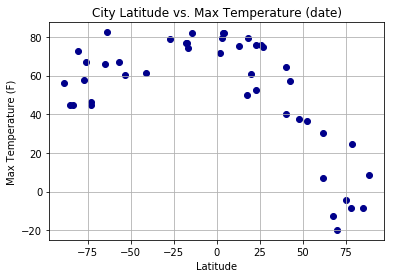

In [253]:
# Create scatterplots

plt.scatter(summary_df['Latitude'], 
            summary_df['Max Temperature'], color='darkblue')

# Set textual properties
#plt.title(f"City Latitude vs. Max Temperature ({date[0]})")
plt.title("City Latitude vs. Max Temperature (date)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid(True)

plt.show()

# Latitude vs. Humidity Plot

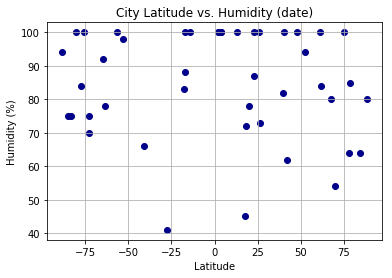

In [254]:
# Create scatterplots

plt.scatter(summary_df['Latitude'], 
            summary_df['Humidity'], color='darkblue')

# Set textual properties

plt.title("City Latitude vs. Humidity (date)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(True)

plt.show()

# Latitude vs. Cloudiness Plot

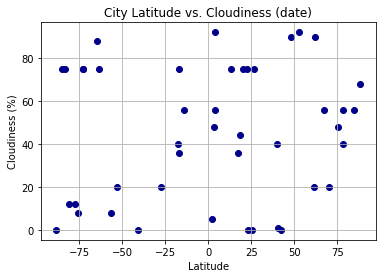

In [255]:
# Create scatterplots

plt.scatter(summary_df['Latitude'], 
            summary_df['Cloudiness'], color='darkblue')

# Set textual properties

plt.title("City Latitude vs. Cloudiness (date)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(True)

plt.show()

# Latitude vs. Windspeed Plot

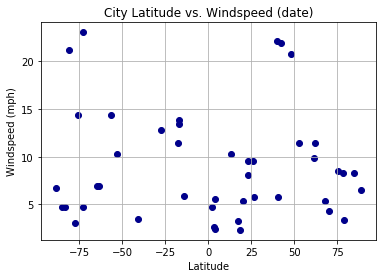

In [256]:
# Create scatterplots

plt.scatter(summary_df['Latitude'], 
            summary_df['Windspeed'], color='darkblue')

# Set textual properties

plt.title("City Latitude vs. Windspeed (date)")
plt.xlabel("Latitude")
plt.ylabel("Windspeed (mph)")
plt.grid(True)

plt.show()